In [1]:
import networkx as nx
from BayesNet import BayesNet
from BNReasoner import BNReasoner

In [29]:
net = BayesNet()
net.load_from_bifxml('./testing/dog_problem.BIFXML')

In [3]:
reasoner = BNReasoner(net)

In [4]:
net.get_all_variables()

['light-on', 'bowel-problem', 'dog-out', 'hear-bark', 'family-out']

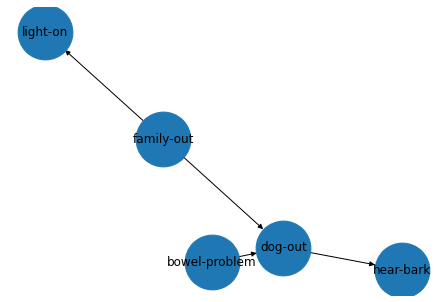

In [5]:
net.draw_structure()

In [6]:
graph = net.get_interaction_graph()

In [7]:
net.get_children('light-on')

[]

In [8]:
net.get_children('dog-out')

['hear-bark']

In [9]:
for x in nx.all_shortest_paths(graph, 'family-out', 'hear-bark'):
    print(x)

['family-out', 'dog-out', 'hear-bark']


In [10]:
for x in nx.all_shortest_paths(graph, 'light-on', 'hear-bark'):
    print(x)

['light-on', 'family-out', 'dog-out', 'hear-bark']


In [11]:
Z = ['family-out']

for path_list in nx.all_shortest_paths(graph, 'light-on', 'hear-bark'):
    path_length = len(path_list)
    for i in range(path_length-1):
        if path_list[i+1] in net.get_children(path_list[i]):
            # causal chain
            pass
        elif path_list[i+1] in Z:
            # common effect
            print(f'Common Effect at {path_list[i+1]}: d-seperated')
            break
        else:
            # d-seperated
            print('d-separated')
            break    

Common Effect at family-out: d-seperated


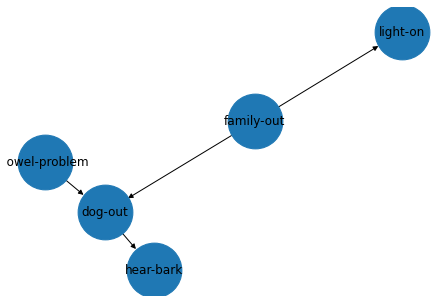

In [12]:
net.draw_structure()

In [13]:
Z = ['family-out']
Z = []
def check_d_separation():
    for path_list in nx.all_shortest_paths(graph, 'light-on', 'hear-bark'):
        path_length = len(path_list)
        if path_length < 3:
            if path_length < 2:
                return True
            elif path_length == 2:
                if path_list[0] in Z or path_list[1] in Z:
                    return True
                else:
                    return False

        d_separated = False 

        for i in range(path_length-2):
            # check triplets
            tr_1 = path_list[i]
            tr_2 = path_list[i+1]
            tr_3 = path_list[i+2]


            if tr_2 in net.get_children(tr_1) and tr_3 in net.get_children(tr_2):
                #causal chain
                if tr_2 in Z:
                    print('causal chain: d-separated')
                    d_separated = True
                    break


            if tr_1 in net.get_children(tr_2) and tr_3 in net.get_children(tr_2):
                # common cause
                if tr_2 in Z:
                    print('common cause: d-separated')
                    d_separated = True
                    break

            if tr_2 in net.get_children(tr_1) and tr_2 in net.get_children(tr_3):
                if tr_2 not in Z:
                    print('common effect: d-separated')
                    d_separated = True
                    break 


        if d_separated is False:
            print('Causal Path found')
            return False


    return True




In [14]:
check_d_separation()

Causal Path found


False

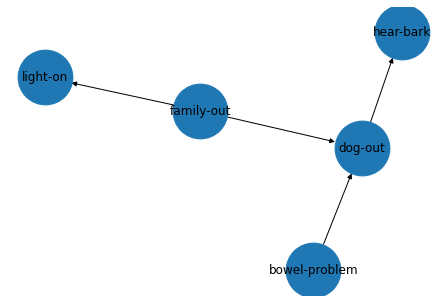

In [23]:
net.draw_structure()

In [30]:
net.get_all_cpts()

{'light-on':    family-out  light-on     p
 0       False     False  0.60
 1       False      True  0.40
 2        True     False  0.05
 3        True      True  0.95,
 'bowel-problem':    bowel-problem     p
 0          False  0.01
 1           True  0.99,
 'dog-out':    family-out  bowel-problem  dog-out     p
 0       False          False    False  0.99
 1       False          False     True  0.01
 2       False           True    False  0.97
 3       False           True     True  0.03
 4        True          False    False  0.90
 5        True          False     True  0.10
 6        True           True    False  0.30
 7        True           True     True  0.70,
 'hear-bark':    dog-out  hear-bark     p
 0    False      False  0.70
 1    False       True  0.30
 2     True      False  0.01
 3     True       True  0.99,
 'family-out':    family-out     p
 0       False  0.15
 1        True  0.85}

In [31]:
updated_cpt = net.get_all_cpts()

In [40]:
updated_cpt['light-on'] = updated_cpt['light-on'].loc[updated_cpt['light-on']['light-on'] == True]

In [47]:
for children in net.get_children('family-out'):
    updated_cpt[children] = updated_cpt[children].loc[updated_cpt[children]['family-out'] == True]

In [27]:
net.update_cpt('light-on', )

In [24]:
net.get_all_cpts()['dog-out']

,family-out,bowel-problem,dog-out,p
0,False,False,False,0.99
1,False,False,True,0.01
2,False,True,False,0.97
3,False,True,True,0.03
4,True,False,False,0.90
5,True,False,True,0.10
6,True,True,False,0.30
7,True,True,True,0.70


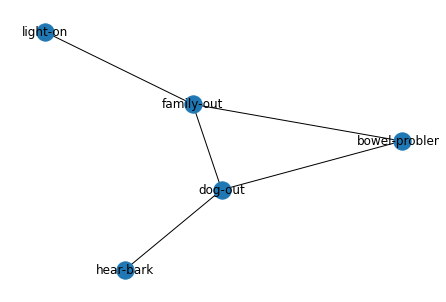

In [22]:
nx.draw(net.get_interaction_graph(), with_labels=True)